In [ ]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats.mstats import winsorize

# Loading Dataset
engine_data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\Automotive_Vehicles_Engine\Dataset\cleaned_engine_data.csv')

In [2]:
engine_data["Timestamp"] = pd.to_datetime(engine_data["Timestamp"])
engine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   engine_rpm        19535 non-null  float64       
 1   lub_oil_pressure  19535 non-null  float64       
 2   fuel_pressure     19535 non-null  float64       
 3   coolant_pressure  19535 non-null  float64       
 4   lub_oil_temp      19535 non-null  float64       
 5   coolant_temp      19535 non-null  float64       
 6   engine_condition  19535 non-null  int64         
 7   temp_diff         19535 non-null  float64       
 8   pressure_ratio    19535 non-null  float64       
 9   Timestamp         19535 non-null  datetime64[ns]
 10  Hour              19535 non-null  int64         
 11  Day_of_week       19535 non-null  int64         
 12  Is_weekend        19535 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 1.9 MB


In [ ]:
engine_data['fuel_pressure'] = winsorize(engine_data['fuel_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values
engine_data['lub_oil_pressure'] = winsorize(engine_data['lub_oil_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values
engine_data['coolant_pressure'] = winsorize(engine_data['coolant_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values


In [4]:
# Features (X) and Target (y)
X = engine_data.drop(columns=['engine_condition'])
y = engine_data['engine_condition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Convert Datetime to Numerical Features
X_train['hour'] = X_train['Timestamp'].dt.hour
X_train['day'] = X_train['Timestamp'].dt.day
X_train['month'] = X_train['Timestamp'].dt.month

X_test['hour'] = X_test['Timestamp'].dt.hour
X_test['day'] = X_test['Timestamp'].dt.day
X_test['month'] = X_test['Timestamp'].dt.month


In [6]:
# drop the original datetime column
X_train.drop(columns=['Timestamp'], inplace=True)
X_test.drop(columns=['Timestamp'], inplace=True)

In [7]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6393652418735603
              precision    recall  f1-score   support

           0       0.53      0.35      0.42      1459
           1       0.68      0.81      0.74      2448

    accuracy                           0.64      3907
   macro avg       0.60      0.58      0.58      3907
weighted avg       0.62      0.64      0.62      3907



- Feature Importance

In [16]:
print("Features in Model:", X_train.columns)
print("Features in Current Dataset:", X.columns)


Features in Model: Index(['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure',
       'lub_oil_temp', 'coolant_temp', 'temp_diff', 'pressure_ratio', 'Hour',
       'Day_of_week', 'Is_weekend', 'hour', 'day', 'month'],
      dtype='object')
Features in Current Dataset: Index(['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure',
       'lub_oil_temp', 'coolant_temp', 'temp_diff', 'pressure_ratio',
       'Timestamp', 'Hour', 'Day_of_week', 'Is_weekend'],
      dtype='object')


In [17]:
# Convert Timestamp to datetime
X["Timestamp"] = pd.to_datetime(X["Timestamp"])

# Extract missing features
X["hour"] = X["Timestamp"].dt.hour
X["day"] = X["Timestamp"].dt.day
X["month"] = X["Timestamp"].dt.month

# Drop Timestamp (if not needed)
X = X.drop(columns=["Timestamp"])


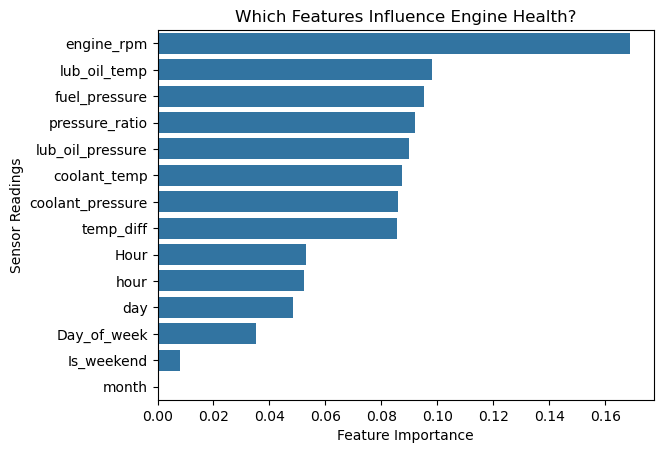

In [18]:
importances = model.feature_importances_
features = X.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.xlabel("Feature Importance")
plt.ylabel("Sensor Readings")
plt.title("Which Features Influence Engine Health?")
plt.show()
